In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc,confusion_matrix
from bokeh.plotting import figure,show,output_notebook
from bokeh.models import Range1d

def plot_roc_curve(target_test, target_predicted_proba):
    fpr, tpr, thresholds = roc_curve(target_test, target_predicted_proba[:, 1])
    
    roc_auc = auc(fpr, tpr) #area under curve
    
    p = figure(title='Receiver Operating Characteristic')
    # Plot ROC curve
    p.line(x=fpr,y=tpr,legend='ROC curve (area = %0.3f)' % roc_auc)
    p.x_range=Range1d(0,1)
    p.y_range=Range1d(0,1)
    p.xaxis.axis_label='False Positive Rate or (1 - Specifity)'
    p.yaxis.axis_label='True Positive Rate or (Sensitivity)'
    p.legend.orientation = "horizontal"
    show(p)

In [6]:
#convert feet and inches to numerical value
from __future__ import division

def ftinconverter(df,column):
    val = df[column]
    
    pattern1 = re.compile('^\d*\' \d*"$') #feet and inches
    pattern2 = re.compile('^\d*\'$') #feet only
    pattern3 = re.compile('^\d*"$') #inches only
    
    if bool(pattern1.match(val)):       
        val = val.replace('"','')
        valsplit = val.split('\'')
        conval = int(valsplit[0]) + (float(valsplit[1]) / 12)
    
    elif bool(pattern2.match(val)):
        val = val.replace('\'','')
        conval = int(val)
    
    elif bool(pattern3.match(val)):
        val = val.replace('"','')
        conval = (float(val) / 12)
        
    else:
        conval = val
        
    return conval
        

In [7]:
#import historical PGA stats from pgatour.com
pga_hist = pd.read_csv("pgahistdata.csv")
data19 = pd.read_csv("pga2019.csv")
data19['Season'] = 2019
pga_hist = pd.concat([pga_hist,data19])

pga_hist.Value = pga_hist.Value.str.replace(',','')
pga_hist.Value = pga_hist.Value.str.replace('$','')
pga_hist.Value = pga_hist.Value.str.replace('+','')
pga_hist.Value = pga_hist.Value.str.replace('- ','-')
pga_hist.Value = pga_hist.Value.str.replace('Under','')
pga_hist.Value = pga_hist.Value.str.replace('E','')
pga_hist.Value = pga_hist.Value.str.replace('T','')
pga_hist.Value = pga_hist.Value.str.replace('ven','')
pga_hist.Value = pga_hist.Value.str.replace('Over','')

pga_hist.Value = pga_hist.apply(ftinconverter,axis=1,column='Value')

pga_hist.dropna(axis=0, subset=['Value'], inplace=True) 

pga_hist[pga_hist.Category.isin(['Off the Tee','Approach the Green','Around the Green','Putting','Scoring'])]

#pivot the data to make it tidy
pga_hist = pga_hist.pivot_table(
        index=['PlayerName', 'Season'], 
         columns='Variable', 
         values='Value',
         aggfunc='first'
).reset_index()


pga_hist = pga_hist.apply(pd.to_numeric, errors='ignore')

pga_hist = pga_hist[pga_hist['Driving Accuracy Percentage - (ROUNDS)']>0].copy()

pga_hist.dropna(thresh=2500,axis=1,how=any,inplace=True)

pga_hist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2840 entries, 2 to 21113
Columns: 1378 entries, PlayerName to YTD Sub-Par Rounds Streak - (VALUE)
dtypes: float64(1375), int64(1), object(2)
memory usage: 29.9+ MB


In [8]:
# Number of missing values in each column of training data
missing_val_count_by_column = (pga_hist.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Variable
11-25 Final Round Performance - (% TIMES IMPROVED)     192
11-25 Final Round Performance - (EVENTS)               192
25+ Final Round Performance - (# OF TIMES IMPROVED)     30
25+ Final Round Performance - (% TIMES IMPROVED)         2
25+ Final Round Performance - (EVENTS)                   2
                                                      ... 
Total 3 Putts - 20-25' - (TOTAL 3 PUTTS)               311
Total Eagles - (TOTAL)                                  20
Total Hole Outs - (HOLE OUTS)                            3
Total Hole Outs - (ROUNDS)                               3
YTD Rounds in 60's Streak - (BEST STREAK)               20
Length: 267, dtype: int64


In [9]:
#import current stats from pgatour.com
pga_2020 = pd.read_csv('111819.csv')

pga_2020.Value = pga_2020.Value.str.replace(',','')
pga_2020.Value = pga_2020.Value.str.replace('$','')
pga_2020.Value = pga_2020.Value.str.replace('+','')
pga_2020.Value = pga_2020.Value.str.replace('- ','-')
pga_2020.Value = pga_2020.Value.str.replace('Under','')
pga_2020.Value = pga_2020.Value.str.replace('E','')
pga_2020.Value = pga_2020.Value.str.replace('T','')
pga_2020.Value = pga_2020.Value.str.replace('ven','')
pga_2020.Value = pga_2020.Value.str.replace('Over','')

pga_2020.Value = pga_2020.apply(ftinconverter,axis=1,column='Value')

pga_2020.dropna(axis=0, subset=['Value'], inplace=True)

pga_2020=pga_2020[pga_2020.Category.isin(['Off the Tee','Approach the Green','Around the Green','Putting','Scoring'])]

#pivot the data to make it tidy
pga_2020 = pga_2020.pivot_table(
        index=['PlayerName', 'Season'], 
         columns='Variable', 
         values='Value',
         aggfunc='first'
).reset_index()

pga_2020 = pga_2020.apply(pd.to_numeric, errors='ignore')

pga_2020 = pga_2020[pga_2020['Driving Accuracy Percentage - (ROUNDS)']>0].copy()

pga_2020.dropna(thresh=225,axis=1,how=any,inplace=True)

pga_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 1 to 562
Columns: 939 entries, PlayerName to Total Putting - (TOTAL)
dtypes: float64(933), int64(1), object(5)
memory usage: 2.3+ MB


In [10]:
# Number of missing values in each column of training data
missing_val_count_by_column = (pga_2020.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Variable
3-Putt Avoidance - Round 1 - (%)                65
3-Putt Avoidance - Round 1 - (TOTAL 3 PUTTS)    65
3-Putt Avoidance - Round 1 - (TOTAL HOLES)      65
3-Putt Avoidance - Round 2 - (%)                82
3-Putt Avoidance - Round 2 - (TOTAL 3 PUTTS)    82
                                                ..
Total Driving - (DISTANCE RANK)                 69
Total Driving - (EVENTS)                        69
Total Driving - (TOTAL)                         69
Total Putting - (EVENTS)                        88
Total Putting - (TOTAL)                         88
Length: 740, dtype: int64


In [21]:
#impute pga historical stats

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()

pga_hist_col_num = pga_hist.select_dtypes(exclude=['object']).columns
imp_pga_hist = pd.DataFrame(imputer.fit_transform(pga_hist[pga_hist_col_num]))
imp_pga_hist.columns = pga_hist_col_num

imp_pga_hist['PlayerName'] = list(pga_hist.PlayerName)
imp_pga_hist['Season'] = list(pga_hist.Season)

pga_2020_col_num = pga_2020.select_dtypes(exclude=['object']).columns
imp_pga_2020 = pd.DataFrame(imputer.fit_transform(pga_2020[pga_2020_col_num]))
imp_pga_2020.columns = pga_2020_col_num

imp_pga_2020['PlayerName'] = list(pga_2020.PlayerName)
imp_pga_2020['Season'] = list(pga_2020.Season)

In [22]:
#impute pga current stats
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()

pga_2020_col_num = pga_2020.select_dtypes(exclude=['object']).columns
imp_pga_2020 = pd.DataFrame(imputer.fit_transform(pga_2020[pga_2020_col_num]))
imp_pga_2020.columns = pga_2020_col_num

imp_pga_2020['PlayerName'] = list(pga_2020.PlayerName)
imp_pga_2020['Season'] = list(pga_2020.Season)

In [23]:
#validate missing values have been imputed
print(imp_pga_hist.isna().values.any())
print(imp_pga_2020.isna().values.any())

False
False


In [24]:
#find the intersection of columns between the historical stats and the current stats
intcol = imp_pga_hist.columns.intersection(imp_pga_2020.columns)
imp_pga_hist = imp_pga_hist[intcol]
imp_pga_2020 = imp_pga_2020[intcol] 
print(len(intcol))

878


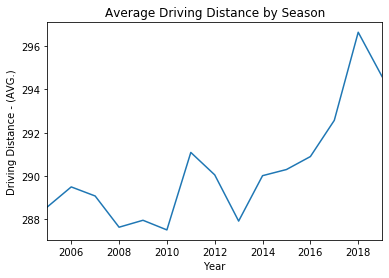

In [25]:
avgseason = imp_pga_hist.groupby('Season')['Driving Distance - (AVG.)'].mean()
avgseason.plot()
plt.ylabel('Driving Distance - (AVG.)')
plt.xlabel('Year')
plt.title('Average Driving Distance by Season')
plt.show()

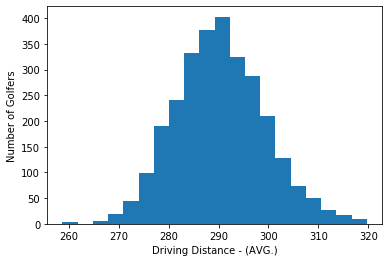

In [26]:
import matplotlib.pyplot as plt

imp_pga_hist['Driving Distance - (AVG.)'].plot(kind='hist',bins=20)
plt.xlabel('Driving Distance - (AVG.)')
plt.ylabel('Number of Golfers')
plt.show()

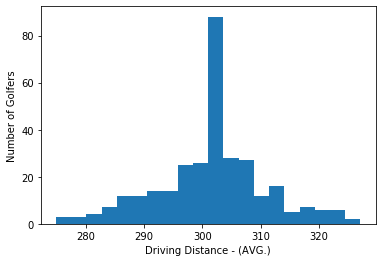

In [27]:
import matplotlib.pyplot as plt

imp_pga_2020['Driving Distance - (AVG.)'].plot(kind='hist',bins=20)
plt.xlabel('Driving Distance - (AVG.)')
plt.ylabel('Number of Golfers')
plt.show()

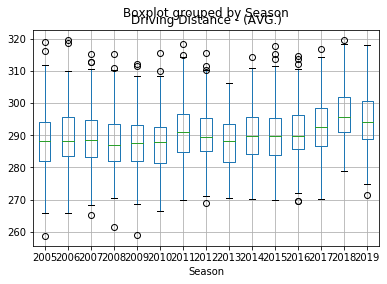

In [28]:
pga_hist.boxplot(column='Driving Distance - (AVG.)', by='Season')

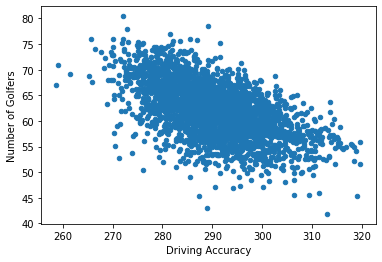

In [29]:
imp_pga_hist.plot(kind='scatter', x='Driving Distance - (AVG.)', y='Driving Accuracy Percentage - (%)')
plt.xlabel('Driving Accuracy')
plt.ylabel('Number of Golfers')
plt.show()

In [30]:
import statsmodels.api as sm
x = list(imp_pga_hist['Driving Distance - (AVG.)'])
y = list(imp_pga_hist['Driving Accuracy Percentage - (%)'])
results = sm.OLS(y, x).fit() #fits the data
slope = results.params[0] #params gives betas
r2 = results.rsquared #r2 value
print (slope)
print (r2)

results.summary()

0.21362273962898598
0.9890840577174196


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                          2.572e+05
Date:                Wed, 27 Nov 2019   Prob (F-statistic):                        0.00
Time:                        03:13:28   Log-Likelihood:                         -9353.4
No. Observations:                2840   AIC:                                  1.871e+04
Df Residuals:                    2839   BIC:                                  1.871e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2136      0.000    507.188      0.000       0.213       0.214
==============================================================================
Omnibus:                        1.685   Durbin-Watson:                   0.694
Prob(Omnibus):                  0.431   Jarque-Bera (JB):                1.644
Skew:                           0.006   Prob(JB):                        0.440
Kurtosis:                       2.883   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
#PGA player names may differ from different sources. To solve for this, I've created an NLP model to identify player names
#example: Alex Noren versus Alexander Noren

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB,MultinomialNB

plist = list(set(list(imp_pga_hist.PlayerName) + list(imp_pga_2020.PlayerName)))
plist = [z.replace('\xa0',' ') for z in plist]

count_vect = TfidfVectorizer(stop_words=[],min_df=0, lowercase=True, token_pattern=r"\b\w+\b",ngram_range=(2,6), analyzer='char_wb'
                             ,binary=False)
words = count_vect.fit_transform(plist)
words

playerfeatures = words
playertarget = plist

clfplayer = MultinomialNB(.001).fit(playerfeatures,playertarget) #.0000000001
#clfplayer = BernoulliNB(.1).fit(playerfeatures,playertarget) #.0000000001

In [35]:
#test NLP player model
docs_new = ['Alexander Noren'] 
X_new = count_vect.transform(docs_new)
predicted = clfplayer.predict(X_new)
prob =  clfplayer.predict_proba(X_new).max(axis=1)
print (predicted)
print (prob)

['Alex Noren']
[0.95366532]


In [45]:
#import web scraped tournament results from espn.com
import glob

file_list = glob.glob('rsm??.csv')
file_list

df_list = []
for i in file_list:
    df = pd.read_csv(i,header=None)
    df['Season'] = int('20' + i.split('.')[0][-2:])
    #df['Season'] = df.Season
    df_list.append(df)

tourn = pd.concat(df_list)

tourn = tourn.rename(columns={1:'player',2:'score'})

tourn = tourn[~tourn.score.isin(['WD','DQ','DNS','E'])]
tourn = tourn[tourn.score!='Cut'] 
tourn['made_cut'] = tourn.score!='CUT'

tourn = tourn.rename(columns={'player': 'PlayerName'})
print (tourn.made_cut.value_counts())
print (sorted(tourn.Season.unique()))
tourn.info()

True     677
False    561
Name: made_cut, dtype: int64
[2010, 2011, 2012, 2014, 2015, 2016, 2017, 2018, 2019]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1238 entries, 0 to 153
Data columns (total 12 columns):
0             1238 non-null object
PlayerName    1238 non-null object
score         1238 non-null object
3             1238 non-null object
4             1238 non-null object
5             1238 non-null object
6             1238 non-null object
7             1238 non-null object
8             1238 non-null object
9             1238 non-null int64
Season        1238 non-null int64
made_cut      1238 non-null bool
dtypes: bool(1), int64(2), object(9)
memory usage: 117.3+ KB


In [46]:
#convert the espn player names to match the names in the pga historical stats data
docs_new = tourn.PlayerName
X_new = count_vect.transform(docs_new)
predicted = clfplayer.predict(X_new)
predictedproba = clfplayer.predict_proba(X_new).max(axis=1)
tourn['playerpred'] = predicted.copy()
tourn['playerproba'] = predictedproba.copy()
tournout = tourn[tourn.playerproba < .97]
tourn = tourn[tourn.playerproba > .97].copy()
tourn.player = tourn.playerpred.copy()
len(tournout)

31

In [47]:
#merge the espn tournament results with the pga historical stats data
comdata = pd.merge(tourn[['PlayerName','score','Season','made_cut']], imp_pga_hist, how='left', on=['PlayerName','Season'])
comdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1207 entries, 0 to 1206
Columns: 880 entries, PlayerName to Total Putting - (TOTAL)
dtypes: bool(1), float64(876), int64(1), object(2)
memory usage: 8.1+ MB


In [48]:
#calculate a players historical made cut
mccount = comdata.groupby(['PlayerName'])
mc = mccount['made_cut'].sum()
tmc = mccount['PlayerName'].count()
mcperc = mc/tmc
mcperc = mcperc.reset_index().rename(columns={0:'mcperc'})
mcperc['tourncount'] = list(tmc)
mcperc['mccount'] = list(mc)
mcperc.sort_values(['mcperc','tourncount'],ascending=[0,0]).head()

,PlayerName,mcperc,tourncount,mccount
121,David Hearn,1.0,6,6.0
408,Webb Simpson,1.0,6,6.0
69,Brice Garnett,1.0,5,5.0
12,Andres Gonzales,1.0,4,4.0
39,Blake Adams,1.0,4,4.0


In [49]:
comdata.dropna(axis=0, inplace=True)
print(comdata.made_cut.value_counts())
comdata.head()

True     568
False    394
Name: made_cut, dtype: int64


,PlayerName,score,Season,made_cut,1-Putts per Round - (AVG),1-Putts per Round - (ROUNDS),1-Putts per Round - (TOTAL 1 PUTTS),1-Putts per Round - (TOTAL ROUNDS),2-Putts per Round - (AVG),2-Putts per Round - (ROUNDS),...,Total Birdies - (ROUNDS),Total Birdies - (TOTAL),Total Driving - (ACCURACY RANK),Total Driving - (DISTANCE RANK),Total Driving - (EVENTS),Total Driving - (TOTAL),Total Eagles - (ROUNDS),Total Eagles - (TOTAL),Total Putting - (EVENTS),Total Putting - (TOTAL)
0,Robert Streb,-14,2015,True,6.95,110.0,764.0,110.0,10.41,110.0,...,110.0,434.0,123.0,36.0,30.0,159.0,110.0,9.0,30.0,103.3
1,Brendon de Jonge,-14,2015,True,7.06,106.0,748.0,106.0,10.34,106.0,...,106.0,400.0,44.0,130.0,31.0,174.0,106.0,6.0,31.0,200.7
3,Ken Duke,-12,2015,True,7.15,93.0,636.0,89.0,9.90,93.0,...,93.0,312.0,23.0,168.0,30.0,191.0,93.0,7.0,30.0,291.4
4,Kevin Kisner,-12,2015,True,7.07,104.0,735.0,104.0,10.32,104.0,...,104.0,367.0,34.0,114.0,30.0,148.0,104.0,6.0,30.0,114.8
5,Chris Kirk,-12,2015,True,7.36,76.0,537.0,73.0,9.86,76.0,...,76.0,271.0,90.0,128.0,21.0,218.0,76.0,8.0,21.0,147.5


In [83]:
features = comdata.drop(columns=['score','PlayerName','made_cut'])
target = comdata.made_cut

In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(features, target, test_size=0.10)

In [85]:
from sklearn.preprocessing import StandardScaler
stan = StandardScaler()
X_train_stan = stan.fit_transform(X_train)
X_train_stan = pd.DataFrame(X_train_stan, columns=features.columns)

X_valid_stan = stan.transform(X_valid)
X_valid_stan = pd.DataFrame(X_valid_stan, columns=features.columns)

In [86]:
X_train_stan.shape

(865, 877)

In [87]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
x = X_train_stan
y = y_train
nb = BernoulliNB()
print (cross_val_score(nb,x,y,cv=10).mean())

0.589672790454667


In [88]:
from sklearn.linear_model import LogisticRegression
x = X_train_stan
y = y_train
lr = LogisticRegression()
print (cross_val_score(lr,x,y,cv=10).mean())

0.6403334669874365


In [89]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
x = X_train_stan
y = y_train
rf = RandomForestClassifier(random_state=0,oob_score=True)
print (cross_val_score(rf,x,y,cv=10).mean())

0.5917738937085368


In [90]:
#tune logistic regression model
from sklearn.linear_model import LogisticRegression

from bokeh.plotting import figure, output_notebook,show
output_notebook()

forest_size = [10,1,.1,.01,.001,.0001,.00001,.000001]

perf = []
for i in forest_size:   
    
    est = LogisticRegression(C=i, random_state=0)

    accuracy = cross_val_score(est,X_train_stan, y_train,cv=10,scoring='accuracy').mean() # ,scoring='precision'
    
    perf.append(accuracy)
p1 = figure(title='learning_rate performance',tools='')

combine = zip(forest_size,perf)
listcomb = list(combine)
df1 = pd.DataFrame(listcomb,columns=['param','perf'])
v1 = df1.param[df1.perf==df1.perf.max(axis=0)].head(1).values[0]

p1.line(x=forest_size,y=perf, color='green')
show(p1)
print(v1)

Loading BokehJS ...

0.01


In [91]:
#fit model with tuned parameter
lr = LogisticRegression(C=v1,random_state=0)
ml = lr.fit(X_train_stan,y_train)

In [92]:
#run X_valid through fitted model
ml.score(X_valid_stan,y_valid)

0.6804123711340206

In [93]:
results = ml.predict(X_valid_stan)
prob = ml.predict_proba(X_valid_stan)

In [94]:
#view confusion matrix
from sklearn.metrics import classification_report,confusion_matrix

cm = confusion_matrix(y_valid,results)
#lets make that easier to read
cm_df = pd.DataFrame(cm, index=['Predicted Class 0', 'Predicted Class 1'], 
                     columns=['Actual Class 0', 'Actual Class 1'])

print (cm_df)
plot_roc_curve(y_valid, prob)

                   Actual Class 0  Actual Class 1
Predicted Class 0              20              22
Predicted Class 1               9              46


In [95]:
#view feature importance
names=features.columns
coefs = ml.coef_[0]
importances = pd.DataFrame(zip(names,ml.coef_[0]))
importances.sort_values((1),ascending = False).head(10)

,0,1
533,One-Putt Percentage - Round 1 - (%),0.112638
332,Fairway Approach (RTP Score) - (AVG RTP),0.107454
124,Average Distance of Birdie putts made - (LONGE...,0.103498
344,First Tee Early Lowest Round - (LOW RND),0.079398
54,Approaches from 125-150 yards (Rgh) - (TOTAL D...,0.076711
50,Approaches from 100-125 yards - (TOTAL DISTANC...,0.076433
51,Approaches from 125-150 yards (Rgh) - (# OF AT...,0.075893
306,Driving Pct. <= 240 (Measured) - (%),0.073004
501,Late Round 1 Scoring Average - (AVG),0.072421
47,Approaches from 100-125 yards - (# OF ATTEMPTS),0.068955


In [96]:
#run current pga stats through fitted model
imp_pga_2020_sub = imp_pga_2020.drop(columns=['PlayerName'])

stan_imp_pga_2020 = stan.fit_transform(imp_pga_2020_sub[list(features.columns)])
stan_imp_pga_2020 = pd.DataFrame(stan_imp_pga_2020, columns=list(features.columns))

results = ml.predict(stan_imp_pga_2020)
proba = ml.predict_proba(stan_imp_pga_2020).max(axis=1).tolist()
res = pd.DataFrame()
res['PlayerName'] = imp_pga_2020.PlayerName
res['results'] = results.tolist()
res['prob'] = proba

In [97]:
res.results.value_counts()

True     197
False    120
Name: results, dtype: int64

In [98]:
res.sort_values(['prob'],ascending=[0]).head(10)

,PlayerName,results,prob
29,Bo Hoag,True,0.958590
85,David Hearn,True,0.957629
307,Xinjun Zhang,True,0.953452
44,Bronson Burgoon,True,0.953074
27,Billy Horschel,True,0.950222
118,J.B. Holmes,False,0.937679
207,Nick Taylor,True,0.935099
188,Matt Kuchar,True,0.930301
206,Nelson Ledesma,False,0.919880
253,Sangmoon Bae,False,0.913000
